<a href="https://colab.research.google.com/github/Jay2251929205/STATS201-prediction-tutorial/blob/main/code/Jiayi_Wang_Analyze_Data_Machine_Learning_for_Predicting_Market_Congestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [90]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [91]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [92]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Jay2251929205/Problem-set2/main/Output%20data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Jay2251929205/Problem-set2/main/Output%20data/Classification_Test.csv",index_col="Unnamed: 0")

In [93]:
C_train.isna().sum()

Positive          0
ROI_past_ma10    11
dtype: int64

## Drop nan for classification Data

In [94]:
C_train =C_train.dropna()

In [95]:
C_train.head()

,Positive,ROI_past_ma10
11,0,0.009393
12,0,0.006334
13,0,-0.003745
14,1,-0.005422
15,0,0.001219


In [96]:
C_test.isna().sum()

Positive         0
ROI_past_ma10    0
dtype: int64

## import train and test data for Regression

In [97]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Jay2251929205/Problem-set2/main/Output%20data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Jay2251929205/Problem-set2/main/Output%20data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [98]:
R_train.isna().sum()

ROI               1
ROI_past_ma10    11
dtype: int64

In [99]:
R_train=R_train.dropna()

In [100]:
R_test.isna().sum()

ROI              0
ROI_past_ma10    0
dtype: int64

In [101]:
R_train.head()

,ROI,ROI_past_ma10
11,-0.024255,0.009393
12,-0.114610,0.006334
13,-0.025550,-0.003745
14,0.087547,-0.005422
15,-0.006919,0.001219


In [102]:
R_test.head()

,ROI,ROI_past_ma10
2013,-0.009386,0.003107
2014,0.002079,0.003070
2015,0.023229,0.003155
2016,0.014439,0.003579
2017,-0.013739,0.003936


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [103]:
C_train.head()

,Positive,ROI_past_ma10
11,0,0.009393
12,0,0.006334
13,0,-0.003745
14,1,-0.005422
15,0,0.001219


In [104]:
X_train = pd.DataFrame(np.array(C_train['ROI_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Positive'].astype(int))

In [105]:
C_test.head()

,Positive,ROI_past_ma10
2013,0,0.003107
2014,1,0.003070
2015,1,0.003155
2016,1,0.003579
2017,0,0.003936


In [106]:
X_test = pd.DataFrame(np.array(C_test['ROI_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Positive'].astype(int))

## Import base packages

In [107]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [110]:
y_pred= mdl.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

## Evaluations

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.50      0.49       476
           1       0.53      0.50      0.51       530

    accuracy                           0.50      1006
   macro avg       0.50      0.50      0.50      1006
weighted avg       0.50      0.50      0.50      1006



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


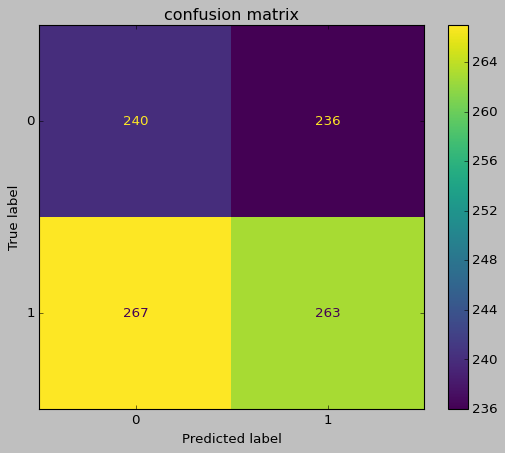

In [112]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


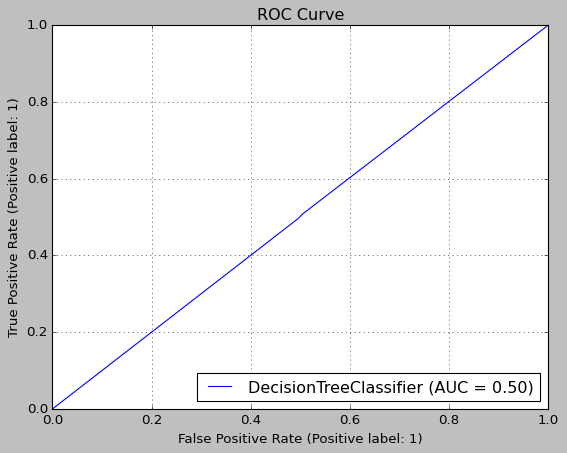

In [113]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-115-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [116]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.47      0.50      0.49       476
           1       0.53      0.50      0.51       530

    accuracy                           0.50      1006
   macro avg       0.50      0.50      0.50      1006
weighted avg       0.50      0.50      0.50      1006



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


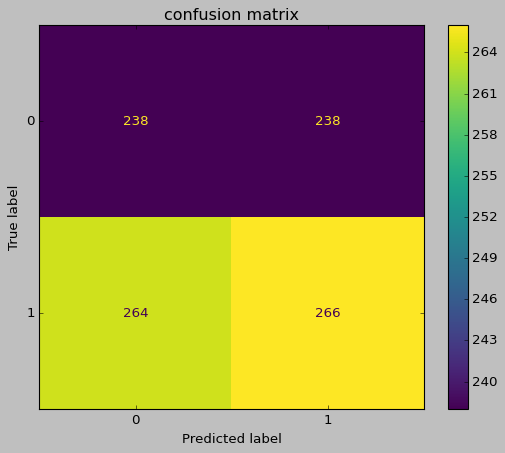

In [117]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


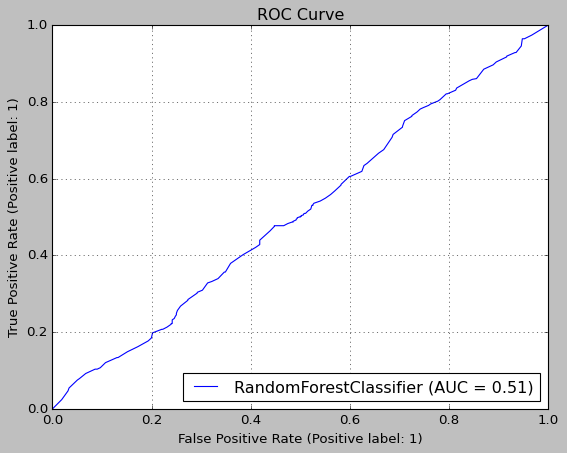

In [118]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [119]:
from sklearn.neural_network import MLPClassifier

In [120]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.90      0.62       476
           1       0.57      0.12      0.20       530

    accuracy                           0.49      1006
   macro avg       0.52      0.51      0.41      1006
weighted avg       0.52      0.49      0.40      1006



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


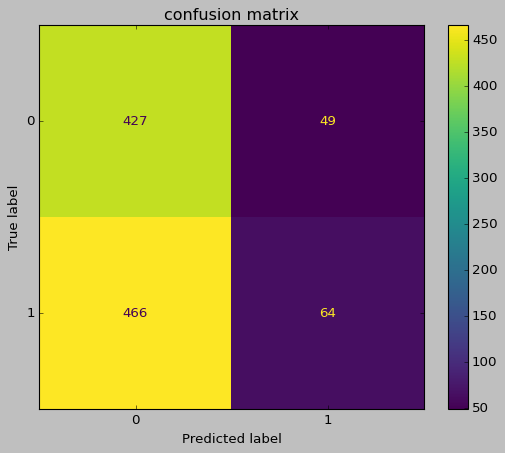

In [122]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [123]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [125]:
train_google = pd.DataFrame(X_train)
train_google['target'] = y_train.values

test_google = pd.DataFrame(X_test)
test_google['target'] = y_test.values

In [126]:
train_data = TabularDataset(train_google)
test_data = TabularDataset(test_google)

In [127]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    2002
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11379.78 MB
	Train Data (Original)  Memory Usage: 0.02 MB (0.0% of available memory)
	Inferring data type of each feature base

In [128]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [129]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.527833,0.527833,0.533742,0.820755,0.646840,0.576060,0.006416,0.001662,0.363313,0.006416,0.001662,0.363313,1,True,7
1,XGBoost,0.526839,0.526839,0.537500,0.730189,0.619200,0.528678,0.008746,0.021355,0.390635,0.008746,0.021355,0.390635,1,True,11
2,NeuralNetTorch,0.523857,0.523857,0.535076,0.733962,0.618934,0.586035,0.013947,0.009893,3.058981,0.013947,0.009893,3.058981,1,True,12
3,WeightedEnsemble_L2,0.523857,0.523857,0.535076,0.733962,0.618934,0.586035,0.015638,0.011590,4.306511,0.001691,0.001698,1.247530,2,True,14
4,KNeighborsDist,0.523857,0.523857,0.552147,0.509434,0.529931,0.491272,0.030127,0.004365,0.007365,0.030127,0.004365,0.007365,1,True,2
5,LightGBMXT,0.522863,0.522863,0.534060,0.739623,0.620253,0.581047,0.048049,0.002802,0.213198,0.048049,0.002802,0.213198,1,True,3
6,LightGBM,0.518887,0.518887,0.549145,0.484906,0.515030,0.536160,0.064065,0.006576,0.343791,0.064065,0.006576,0.343791,1,True,4
7,NeuralNetFastAI,0.516899,0.516899,0.531700,0.696226,0.602941,0.583541,0.023905,0.015097,2.713770,0.023905,0.015097,2.713770,1,True,10
8,LightGBMLarge,0.511928,0.511928,0.537285,0.530189,0.533713,0.533666,0.008913,0.004894,0.864946,0.008913,0.004894,0.864946,1,True,13
9,ExtraTreesGini,0.510934,0.510934,0.537255,0.516981,0.526923,0.498753,0.268779,0.135759,0.655928,0.268779,0.135759,0.655928,1,True,8


# Machine Learning Regression

## important global packages

In [130]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [131]:
R_train.head()

,ROI,ROI_past_ma10
11,-0.024255,0.009393
12,-0.114610,0.006334
13,-0.025550,-0.003745
14,0.087547,-0.005422
15,-0.006919,0.001219


In [132]:
X_train = pd.DataFrame(R_train['ROI_past_ma10'])
y_train = pd.DataFrame(R_train['ROI'])

In [133]:
R_test.head()

,ROI,ROI_past_ma10
2013,-0.009386,0.003107
2014,0.002079,0.003070
2015,0.023229,0.003155
2016,0.014439,0.003579
2017,-0.013739,0.003936


In [134]:
X_test = pd.DataFrame(R_test['ROI_past_ma10'])
y_test = pd.DataFrame(R_test['ROI'])

## Linear Regression

In [135]:
from sklearn import linear_model

In [136]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [137]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.0005342168568125416


In [138]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.000551
1,0.000547
2,0.000556
3,0.000598
4,0.000633
...,...
1001,0.000423
1002,0.000417
1003,0.000422
1004,0.000417


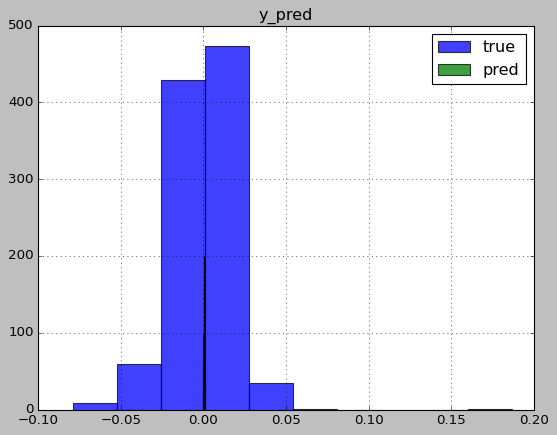

In [139]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-141-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [142]:
# calculate R2
from sklearn.metrics import r2_score

In [143]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.5837027347733825


In [144]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,-0.011401
1,-0.015802
2,-0.021436
3,0.004792
4,0.002976
...,...
1001,-0.000980
1002,-0.001733
1003,0.000688
1004,-0.001355


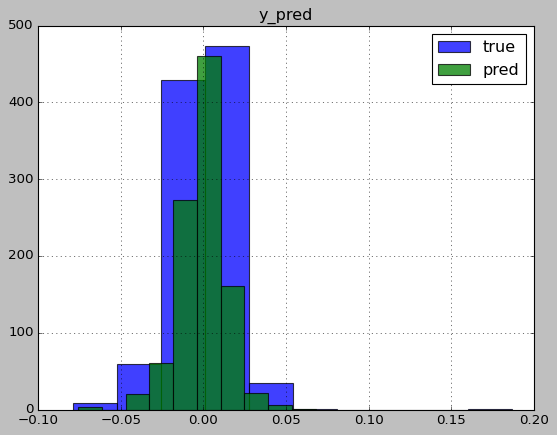

In [145]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [146]:
train_google = pd.DataFrame(X_train)
train_google['target'] = y_train.values

test_google = pd.DataFrame(X_test)
test_google['target'] = y_test.values

In [147]:
train_data = TabularDataset(train_google)
test_data = TabularDataset(test_google)

In [148]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    2002
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.2166645400025518, -0.1381498781478473, 0.00025, 0.02535)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12554.62 MB
	Train Data (Original)  Memory Usage: 0.02 MB (0.0% of available memor

In [149]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [150]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-0.017635,-0.017635,-0.000311,-0.012635,-0.009972,0.000184,-0.028085,0.001929,0.002043,0.248159,0.001929,0.002043,0.248159,1,True,4
1,LightGBMXT,-0.017639,-0.017639,-0.000311,-0.012644,-0.009965,-0.000266,-0.028087,0.002221,0.007756,0.228936,0.002221,0.007756,0.228936,1,True,3
2,CatBoost,-0.017641,-0.017641,-0.000311,-0.012644,-0.009981,-0.000446,-0.028086,0.018074,0.001068,0.215817,0.018074,0.001068,0.215817,1,True,6
3,LightGBMLarge,-0.017646,-0.017646,-0.000311,-0.012647,-0.009951,-0.001018,-0.028086,0.058077,0.029266,0.885167,0.058077,0.029266,0.885167,1,True,11
4,NeuralNetFastAI,-0.017691,-0.017691,-0.000313,-0.012746,-0.010128,-0.006091,-0.027806,0.051492,0.035413,3.061542,0.051492,0.035413,3.061542,1,True,8
5,WeightedEnsemble_L2,-0.017691,-0.017691,-0.000313,-0.012746,-0.010128,-0.006091,-0.027806,0.054120,0.036137,3.907148,0.002627,0.000725,0.845606,2,True,12
6,NeuralNetTorch,-0.017769,-0.017769,-0.000316,-0.012668,-0.009842,-0.015016,-0.028381,0.039247,0.008448,6.593012,0.039247,0.008448,6.593012,1,True,10
7,XGBoost,-0.018079,-0.018079,-0.000327,-0.012894,-0.010152,-0.050684,-0.029016,0.047384,0.008529,0.231590,0.047384,0.008529,0.231590,1,True,9
8,KNeighborsUnif,-0.020004,-0.020004,-0.000400,-0.014745,-0.011556,-0.286425,-0.030798,0.045921,0.029912,0.006284,0.045921,0.029912,0.006284,1,True,1
9,ExtraTreesMSE,-0.021412,-0.021412,-0.000458,-0.015906,-0.012452,-0.473933,-0.032553,0.228360,0.062463,0.571438,0.228360,0.062463,0.571438,1,True,7


In [151]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -0.006091134768027251


In [152]:
y_pred = predictor.predict(X_test)
y_pred

2013   -0.000719
2014   -0.000712
2015   -0.000727
2016   -0.000692
2017   -0.000583
          ...   
3014   -0.000709
3015   -0.000778
3016   -0.000724
3017   -0.000776
3018   -0.000919
Name: target, Length: 1006, dtype: float32

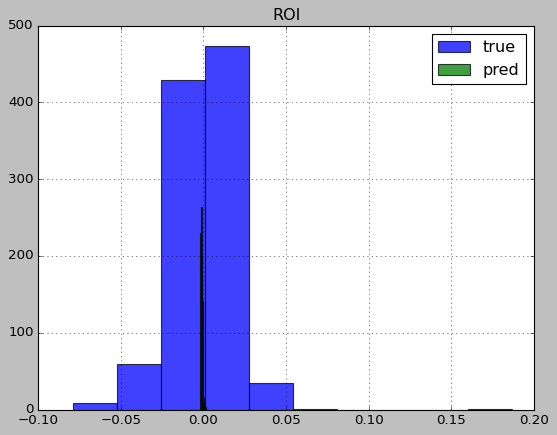

In [153]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Bayesian Ridge Regression


reference: https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp

In [154]:
from sklearn import linear_model

In [155]:
mdl = linear_model.BayesianRidge().fit(X_train, y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: 1.0


In [157]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,-0.009386
1,0.002079
2,0.023229
3,0.014439
4,-0.013739
...,...
1001,-0.006072
1002,-0.003879
1003,-0.007898
1004,-0.009985


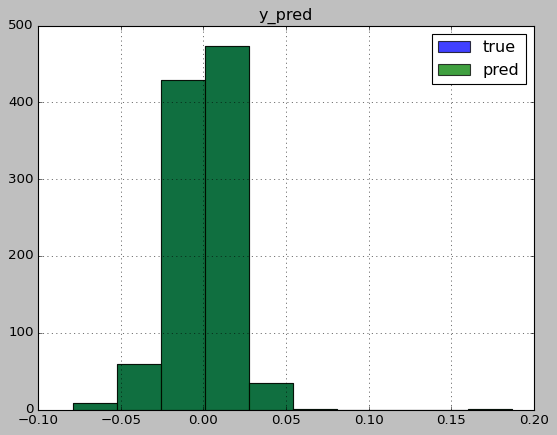

In [158]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

## ElasticNet

In [165]:
from sklearn.linear_model import ElasticNet

In [170]:
enet = ElasticNet(alpha=0.75, l1_ratio=0.7)
mdl = ElasticNet(alpha=0.75, l1_ratio=0.7).fit(X_train, y_train)

In [167]:
mdl = ElasticNet().fit(X_train, y_train)

In [168]:
r2 = r2_score(y_test, mdl.predict(X_test))

print(f'R2 Score: {r2}')


R2 Score: -2.9268401556148405e-05


In [163]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.000252
1,0.000252
2,0.000252
3,0.000252
4,0.000252
...,...
1001,0.000252
1002,0.000252
1003,0.000252
1004,0.000252


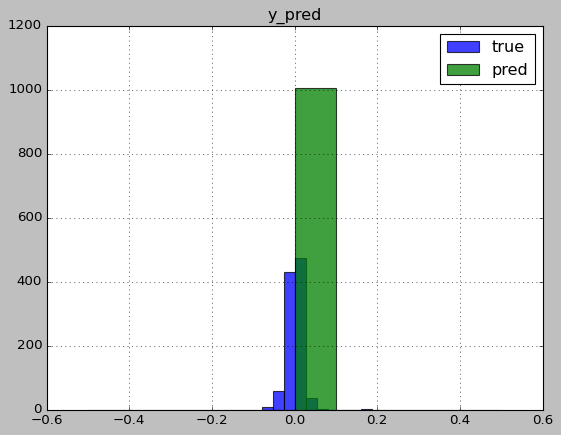

In [164]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()